## _Preprocessing and Modeling:_

The steps I will take for preprcoessing and modeling will be using Pycaret. I will run models using SMOTE oversampling and without SMOTE. After, I will compare the performance of the best models from each and tune parameters in order to see if I can achieve better results based on the metrics I am wanting to optimize. In terms of metrics, I will use: 
    
   > 1. AUC - higher AUC means the model is actually predicting based on given variables and not just guessing 
   > 2. Recall -  represents the ability of the model to correctly identify positive cases which is the goal for this project
   > 3. Precision - not my main metric but I do want to see if I can maximize without sacrificing the other metrics  

In [3]:
import pandas as pd
import numpy as np

from pycaret.classification import *

In [4]:
cancer = pd.read_csv('../Data/model_cancer').drop(columns = 'Unnamed: 0')

In [5]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### _Defining X and y, not needed in the modeling process but its habit and I want to see the current class balance again_

In [50]:
X = cancer.drop(columns = 'diagnosis')
y = cancer['diagnosis']
y.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

### _Using Pycaret classification to quickly go through models_
With the use of Pycaret I can fix the class imbalances using the fix_imbalance parameter. The default method used is SMOTE which is an oversampling technique. You can use this link if you want to learn more about this process: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [6]:
cancer_class = setup(data = cancer, target = 'diagnosis', session_id=123, fix_imbalance= True) 

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(671, 31)"
5,Transformed train set shape,"(500, 31)"
6,Transformed test set shape,"(171, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9674,0.9953,0.9462,0.9672,0.9548,0.9294,0.9315,0.4800
et,Extra Trees Classifier,0.9672,0.9965,0.9462,0.9674,0.9551,0.9294,0.9314,0.5660
qda,Quadratic Discriminant Analysis,0.9646,0.9952,0.9590,0.9482,0.9526,0.9244,0.9257,0.3500
ridge,Ridge Classifier,0.9624,0.0000,0.9262,0.9741,0.9466,0.9178,0.9216,0.3290
lda,Linear Discriminant Analysis,0.9624,0.9931,0.9062,0.9938,0.9451,0.9170,0.9221,0.3520
lightgbm,Light Gradient Boosting Machine,0.9598,0.9940,0.9395,0.9542,0.9447,0.9132,0.9158,0.7380
rf,Random Forest Classifier,0.9572,0.9941,0.9595,0.9378,0.9449,0.9102,0.9150,0.5830
xgboost,Extreme Gradient Boosting,0.9572,0.9916,0.9462,0.9426,0.9422,0.9083,0.9109,0.4340
gbc,Gradient Boosting Classifier,0.9522,0.9902,0.9462,0.9355,0.9371,0.8987,0.9034,0.6460
lr,Logistic Regression,0.9472,0.9936,0.9329,0.9337,0.9295,0.8875,0.8922,1.2670


### _Now that I have a best model with class balance, will do the same with the classes unbalanced and compare_

In [10]:
cancer_ = setup(data = cancer, target = 'diagnosis', session_id=123) 

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(398, 31)"
6,Transformed test set shape,"(171, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [11]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.9961,0.9329,0.9795,0.9539,0.9287,0.9313,0.4910
ada,Ada Boost Classifier,0.9622,0.9911,0.9395,0.9621,0.9484,0.9187,0.9215,0.4170
lda,Linear Discriminant Analysis,0.9599,0.9920,0.8924,1.0000,0.9412,0.9112,0.9165,0.3420
lightgbm,Light Gradient Boosting Machine,0.9599,0.9926,0.9262,0.9665,0.9437,0.9127,0.9156,0.4340
qda,Quadratic Discriminant Analysis,0.9571,0.9952,0.9390,0.9478,0.9420,0.9080,0.9097,0.3280
gbc,Gradient Boosting Classifier,0.9547,0.9921,0.9390,0.9453,0.9393,0.9033,0.9068,0.6020
xgboost,Extreme Gradient Boosting,0.9547,0.9918,0.9329,0.9503,0.9374,0.9021,0.9068,0.4590
rf,Random Forest Classifier,0.9546,0.9939,0.9390,0.9460,0.9397,0.9034,0.9070,0.4790
ridge,Ridge Classifier,0.9497,0.0000,0.8852,0.9788,0.9268,0.8890,0.8944,0.3000
lr,Logistic Regression,0.9448,0.9923,0.9062,0.9509,0.9234,0.8806,0.8862,0.3590


### _Plotting out graphs for both of the best models from each and compare_ 
    
   > 1. Feature Importances
   > 2. ROC Curves with AUC
   > 3. Precision-Recall Curve
   > 4. Confusion Matrix
    

#### _Feature Importance:_

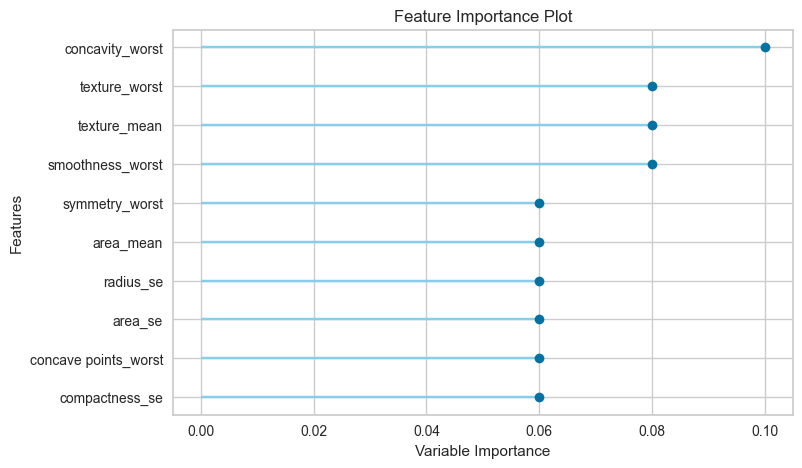

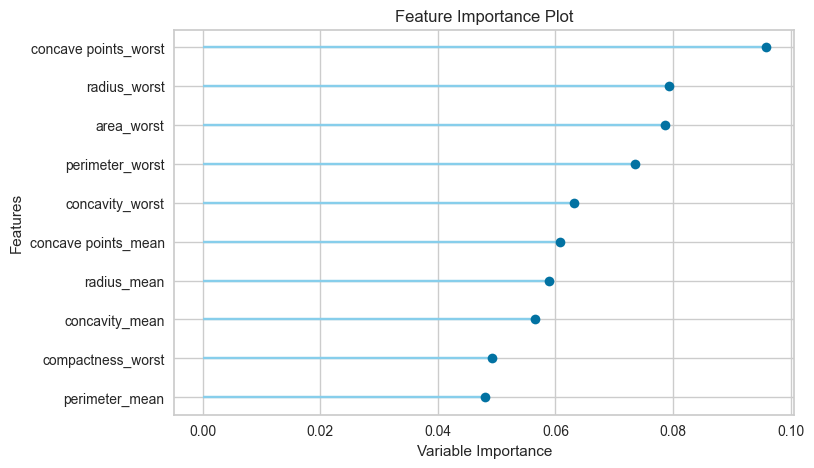

In [21]:
plot_model(best, plot = 'feature')
plot_model(best2, plot = 'feature')

> _Discuss:_

#### _ROC Curves:_

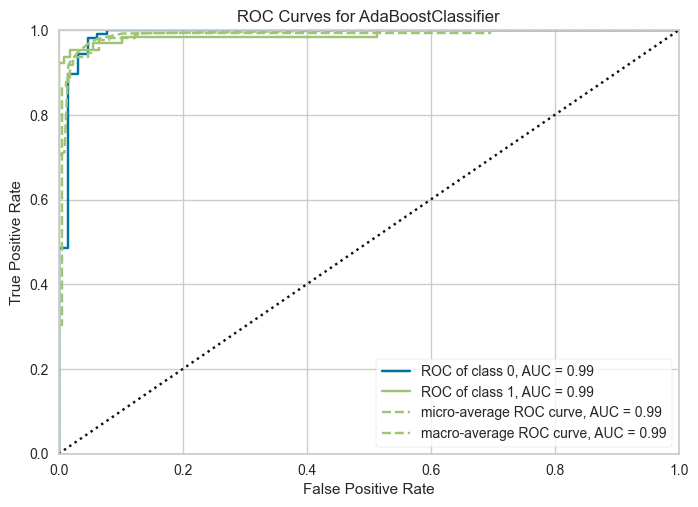

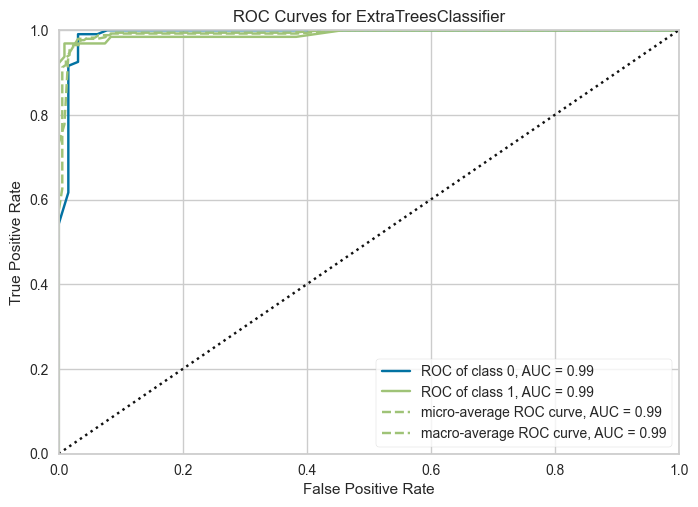

In [22]:
plot_model(best, plot = 'auc')
plot_model(best2, plot = 'auc')

> Comparison

#### _Precision - Recall Curve:_

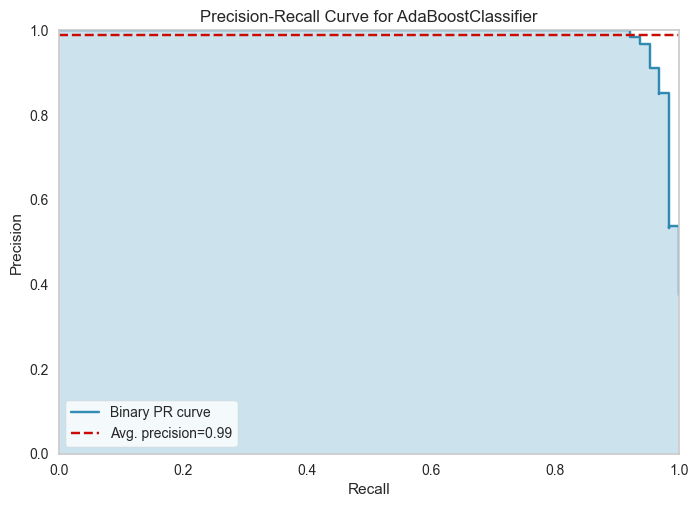

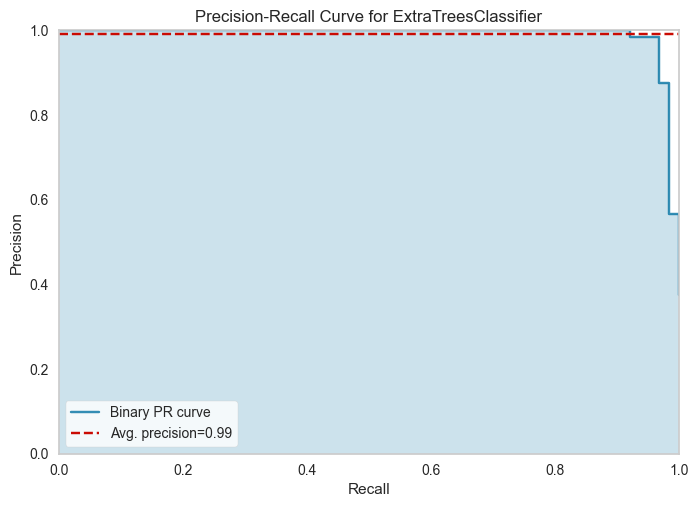

In [24]:
plot_model(best, plot = 'pr')
plot_model(best2, plot = 'pr')

> Discussion

#### _Confusion Matrices:_

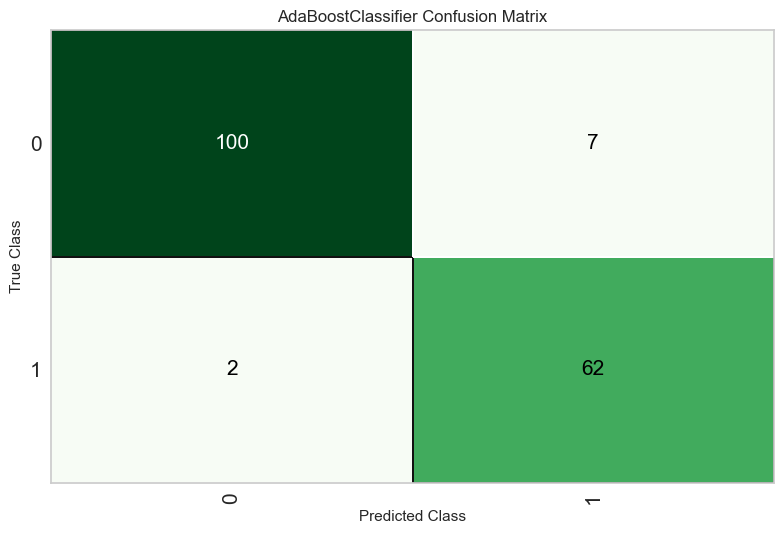

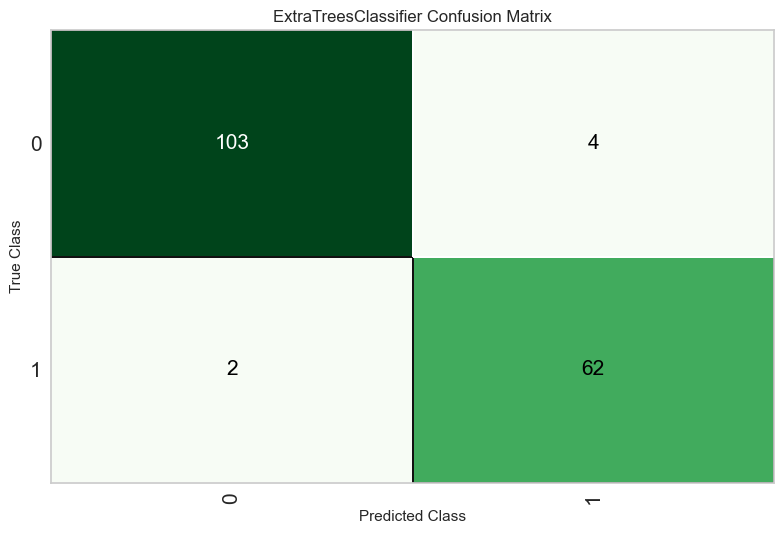

In [23]:
plot_model(best, plot = 'confusion_matrix')
plot_model(best2, plot = 'confusion_matrix')

### _Making predictions using the  Ada Boost model with SMOTE oversampling and Extra Trees without SMOTE_

In [20]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.9474,0.9890,0.9688,0.8986,0.9323,0.8894,0.8911


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,583.000000,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541,0,0,0.7496
21,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,314.899994,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,0,0,0.8212
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,488.399994,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349,0,0,0.6320
136,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,546.700012,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,0,0,0.7614
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.000000,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,1,1,0.7331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,13.460000,18.750000,87.440002,551.099976,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,719.799988,0.16240,0.3124,0.26540,0.14270,0.3518,0.08665,0,1,0.5153
142,11.430000,17.309999,73.660004,398.000000,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,503.000000,0.14130,0.1792,0.07708,0.06402,0.2584,0.08096,0,0,0.8739
238,14.220000,27.850000,92.550003,623.900024,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,764.000000,0.10810,0.2426,0.30640,0.08219,0.1890,0.07796,0,0,0.5413
106,11.640000,18.330000,75.169998,412.500000,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,521.700012,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,0,0,0.7029


In [19]:
predict_model(best2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9649,0.9918,0.9688,0.9394,0.9538,0.9256,0.9258


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,583.000000,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541,0,0,0.99
21,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,314.899994,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,0,0,1.00
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,488.399994,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349,0,0,0.93
136,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,546.700012,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,0,0,0.98
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.000000,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,13.460000,18.750000,87.440002,551.099976,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,719.799988,0.16240,0.3124,0.26540,0.14270,0.3518,0.08665,0,0,0.74
142,11.430000,17.309999,73.660004,398.000000,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,503.000000,0.14130,0.1792,0.07708,0.06402,0.2584,0.08096,0,0,1.00
238,14.220000,27.850000,92.550003,623.900024,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,764.000000,0.10810,0.2426,0.30640,0.08219,0.1890,0.07796,0,0,0.62
106,11.640000,18.330000,75.169998,412.500000,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,521.700012,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,0,0,0.89


### _Conclusion/Recommendations:_

Let's go through some of the differences seen when using the SMOTE oversampling technique vs without SMOTE:

   |Models|AUC|Accuracy|Precision|Recall|
   |---|---|---|---|---|
   |AdaBoost (SMOTE)|.9890|.9474|.8986|.9688|
   |Extra Trees (w/o SMOTE)|**.9918**|**.9649**|**.9394**|.9688|
   

Both of the models did better than I thought they would, given the amount of data I used. It is apparent that not using oversampling led to a better result in all metrics except Recall, in which the two models were equal. 

Moving forward, there is room for growth, particuarly with the amount of data available. The models worked well enough for a baseline but they are no where near production ready in their current state.
  